In [1]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/FoodClassification/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/FoodClassification/Validation_Data'

In [4]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 83 images belonging to 10 classes.
Found 83 images belonging to 10 classes.


In [5]:
train_dataset.class_indices

{'Banhbao': 0,
 'Banhbeo': 1,
 'Banhbotloc': 2,
 'Banhchung': 3,
 'Banhcuon': 4,
 'Banhdalon': 5,
 'Banhgio': 6,
 'Banhhoi': 7,
 'Banhxeo': 8,
 'Comtam': 9}

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
9/9 [==============================] - 3s 342ms/step - loss: 1.8772 - accuracy: 0.4096 - val_loss: 2.1316 - val_accuracy: 0.3253
Epoch 2/50
9/9 [==============================] - 3s 341ms/step - loss: 2.1201 - accuracy: 0.1928 - val_loss: 1.9969 - val_accuracy: 0.2651
Epoch 3/50
9/9 [==============================] - 3s 334ms/step - loss: 2.0172 - accuracy: 0.3373 - val_loss: 1.9975 - val_accuracy: 0.3855
Epoch 4/50
9/9 [==============================] - 3s 333ms/step - loss: 1.9974 - accuracy: 0.3133 - val_loss: 1.9542 - val_accuracy: 0.4096
Epoch 5/50
9/9 [==============================] - 3s 326ms/step - loss: 1.9369 - accuracy: 0.3855 - val_loss: 1.8630 - val_accuracy: 0.4217
Epoch 6/50
9/9 [==============================] - 3s 329ms/step - loss: 1.8620 - accuracy: 0.3494 - val_loss: 1.7436 - val_accuracy: 0.4578
Epoch 7/50
9/9 [==============================] - 4s 511ms/step - loss: 1.7329 - accuracy: 0.3735 - val_loss: 1.5969 - val_accuracy: 0.4217
Epoch 8/50
9/9 [====

In [19]:
model.save('/content/drive/MyDrive/FoodClassification/FoodClassification.h5')

In [20]:
classificationFood_model = load_model('/content/drive/MyDrive/FoodClassification/FoodClassification.h5')

In [21]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

9/9 [==============================] - 1s 145ms/step - loss: 0.1450 - accuracy: 0.9639
Test loss =  0.1449504792690277
Test accuracy =  0.9638554453849792


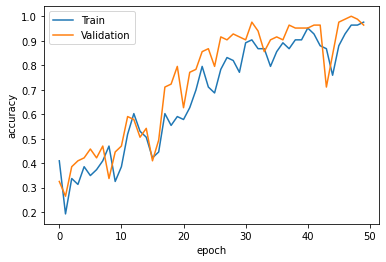

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  Banhbao


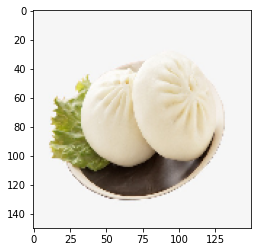

In [24]:
img = load_img('/content/drive/MyDrive/FoodClassification/PredictFood/banhbao.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhbeo',
 'Banhbotloc',
 'Banhchung',
 'Banhcuon',
 'Banhdalon',
 'Banhgio',
 'Banhhoi',
 'Banhxeo',
 'Comtam']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Comtam


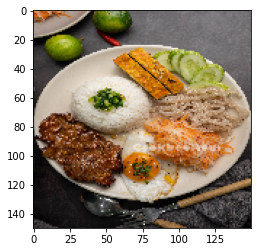

In [25]:
img = load_img('/content/drive/MyDrive/FoodClassification/PredictFood/comtam.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhbeo',
 'Banhbotloc',
 'Banhchung',
 'Banhcuon',
 'Banhdalon',
 'Banhgio',
 'Banhhoi',
 'Banhxeo',
 'Comtam']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Banhgio


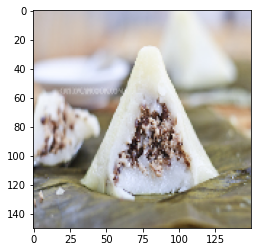

In [26]:
img = load_img('/content/drive/MyDrive/FoodClassification/PredictFood/banhgio.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhbeo',
 'Banhbotloc',
 'Banhchung',
 'Banhcuon',
 'Banhdalon',
 'Banhgio',
 'Banhhoi',
 'Banhxeo',
 'Comtam']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Banhcuon


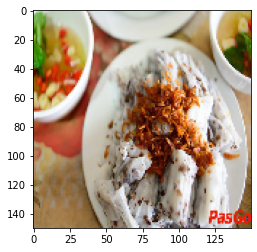

In [30]:
img = load_img('/content/drive/MyDrive/FoodClassification/PredictFood/banh-cuon1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhbeo',
 'Banhbotloc',
 'Banhchung',
 'Banhcuon',
 'Banhdalon',
 'Banhgio',
 'Banhhoi',
 'Banhxeo',
 'Comtam']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Banhdalon


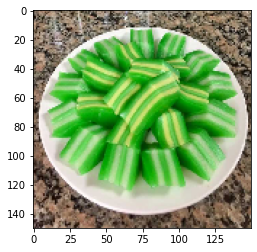

In [34]:
img = load_img('/content/drive/MyDrive/FoodClassification/PredictFood/banhdaheo.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banhbao',
 'Banhbeo',
 'Banhbotloc',
 'Banhchung',
 'Banhcuon',
 'Banhdalon',
 'Banhgio',
 'Banhhoi',
 'Banhxeo',
 'Comtam']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

In [38]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FoodClassification.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FoodClassification.ipynb to pdf
[NbConvertApp] Support files will be in FoodClassification_files/
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Making directory ./FoodClassification_files
[NbConvertApp] Writing 58729 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'